In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes2.csv


In [2]:
import numpy as np
import pandas as pd
import math

# Read the CSV file
def read_csv_file(filename):
    df = pd.read_csv(filename)
    return df

#Get the no. of columns in pandas dataframe
def get_no_of_columns(pandas_dataframe):
    no_of_columns = len(pandas_dataframe.iloc[0]) - 1
    return no_of_columns

def get_no_of_training_examples(pandas_dataframe):
    no_of_rows = len(pandas_dataframe)
    return no_of_rows
    
#Function that splits the dataset into input features and target label
def split_dataset_feature_target(pandas_dataframe, no_of_columns):
    df1 = pandas_dataframe.copy()
    df1_target = df1['Outcome'].copy()
    df1_input = df1.iloc[:,:no_of_columns].copy()
    return df1_input, df1_target

# Function to split the dataset into train, dev, test
# train_percent, dev_percent and test_percent should be in terms of %. Eg: 60,20,20; or 80,10,10
def train_dev_test_split(dataset, train_percent, dev_percent, test_percent):
    if train_percent + dev_percent + test_percent != 100:
        raise Exception("Illegal split ratio")
    no_of_rows = len(dataset)
    dataset.sample(frac=1).reset_index(drop=True) #shuffling rows in the dataset
    no_of_train_rows = math.floor(train_percent * no_of_rows / 100)
    no_of_dev_rows = math.floor(dev_percent * no_of_rows / 100)
    no_of_test_rows = no_of_rows - (no_of_train_rows + no_of_dev_rows)
    train_set = dataset[:no_of_train_rows]
    dev_set = dataset[no_of_train_rows: no_of_train_rows+no_of_dev_rows]
    test_set = dataset[no_of_train_rows+no_of_dev_rows:]
    return train_set, dev_set, test_set

#filename='/kaggle/input/diabetes-dataset/diabetes2.csv'
#df = read_csv_file(filename)
#print(df.head())
#print("\nTarget Labels: ",df.Outcome.unique())

In [8]:
# Normalize the dataset (dataset should contain both input features and target label)
# The function normalizes only the input feature values.
def normalize_dataset(pandas_dataframe, no_of_columns):
    df_normalize = pandas_dataframe.iloc[:,:no_of_columns].copy()
    df_normalize = (df_normalize - df_normalize.min())/(df_normalize.max() - df_normalize.min())
    return df_normalize
    

In [3]:
#ML Model Definitions
import numpy as np

def sigmoid(x):
    return 1/(1 + np.exp(-x))

def initialize_weights_and_bias(matrix_shape): 
    print("Inside function")
    w = np.random.rand(matrix_shape[0], matrix_shape[1])
    b = 0.0
    return w,b

def calc_output(x,w,b):
    z = np.dot(w.T,x) + b
    a = sigmoid(z)
    return a
"""
    The function below is used to compute the cost of logistic regression. Here, I am adding a very
    small constant epsilon, to the log terms. This is done to avoid divide by zero.
"""

def cost_function(y,yhat):
    epsilon = 1e-6
    m = len(y[0])
    # print("m: ", m)
    # log1 = np.log(yhat.T + epsilon)
    # print("Log1: ", log1)
    # log2 = np.log(1 + epsilon -yhat.T)
    # print("Log2: ", log2)
    # prod1 = np.dot(y,log1)
    # print("Prod1: ", prod1)
    # prod2 = np.dot((1-y),log2)
    # print("Prod2: ", prod2)
    # sum1 = np.sum(prod1)
    # print("Sum1: ", sum1)
    # sum2 = np.sum(prod2)
    # print("Sum2: ", sum2)
    cost = -(np.sum(np.dot(y, np.log(yhat.T + epsilon))) + np.sum(np.dot((1-y),np.log(1 + epsilon -yhat.T))))/m
    return cost


In [4]:
# Gradient Descent
import numpy as np

def batch_gradient_descent(epochs, learning_rate, train_x, train_y, dev_x, dev_y, w, b):
    m = len(train_y[0])
    # print("m: ", m)
    cost_train = {}
    cost_dev = {}
    params = {}
    for iter in range(epochs):
        train_yhat = calc_output(train_x, w, b)
        dev_yhat = calc_output(dev_x, w, b)
        cost_train[iter] = cost_function(train_y,train_yhat)
        cost_dev[iter] = cost_function(dev_y, dev_yhat)
        dZ = train_yhat - train_y
        dW = (np.dot(train_x, dZ.T))/m
        # print("dW: ", dW)
        db = (np.sum(dZ))/m
        # print("db: ", db)
        w = w - learning_rate * dW
        b = b - learning_rate * db
        params[iter] = {}
        params[iter]["w"] = w
        params[iter]["b"] = b
    return params, cost_train, cost_dev

#Function to predict
def predict(x, w, b, thresh):
    yhat = calc_output(x, w, b)
    yhat = yhat.transpose()
    predicted_values = [1 if ele>thresh else 0 for ele in yhat]
    return np.array(predicted_values)

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def find_confusion_matrix(y_predict, y_actual):
    fp_list = [1 for itr in y_predict if y_predict[itr]==1 and y_actual[itr]==0]
    fp = len(fp_list)
    tn_list = [1 for itr in y_predict if y_predict[itr]==0 and y_actual[itr]==0]
    tn = len(tn_list)
    tp_list = [1 for itr in y_predict if y_predict[itr]==1 and y_actual[itr]==1]
    tp = len(tp_list)
    fn_list = [1 for itr in y_predict if y_predict[itr]==0 and y_actual[itr]==1]
    fn = len(fn_list)
    return tp, tn, fp, fn

def calculate_model_accuracy(train_input, train_target, dev_input, dev_target, test_input, test_target, w, b, threshold):
    y_train_predict = predict(train_input, w, b, threshold)
    y_train_predict = y_train_predict.transpose()
    # print(y_train_predict[:5])
    y_train_actual = np.array(train_target.transpose().copy())
    y_train_actual = y_train_actual.reshape(len(y_train_actual), 1)
    # print(y_train_actual[:5])
    y_valid_predict = predict(dev_input, w, b, threshold)
    y_valid_predict = y_valid_predict.transpose()
    # print(y_valid_predict.shape)
    y_valid_actual = np.array(dev_target.transpose().copy())
    y_valid_actual = y_valid_actual.reshape(len(y_valid_actual), 1)
    # print(y_valid_actual.shape)
    y_test_predict = predict(test_input, w, b, threshold)
    y_test_predict = y_test_predict.transpose()
    y_test_actual = np.array(test_target.transpose().copy())
    y_test_actual = y_test_actual.reshape(len(y_test_actual), 1)
    train_tp, train_tn, train_fp, train_fn = find_confusion_matrix(y_train_predict, y_train_actual)
    train_accuracy = ((train_tp + train_tn) * 100)/(train_tp + train_tn + train_fp + train_fn)
    dev_tp, dev_tn, dev_fp, dev_fn = find_confusion_matrix(y_valid_predict, y_valid_actual)
    dev_accuracy = ((dev_tp + dev_tn) * 100)/(dev_tp + dev_tn + dev_fp + dev_fn)
    test_tp, test_tn, test_fp, test_fn = find_confusion_matrix(y_test_predict, y_test_actual)
    test_accuracy = ((test_tp + test_tn) * 100)/(test_tp + test_tn + test_fp + test_fn)
#     train_accuracy = (100 - np.mean(np.abs(y_train_predict - y_train_actual)) * 100) 
#     dev_accuracy = (100 - np.mean(np.abs(y_valid_predict - y_valid_actual)) * 100)
#     test_accuracy = (100 - np.mean(np.abs(y_test_predict - y_test_actual)) * 100)
    train_error = 100 - train_accuracy
    dev_error = 100 - dev_accuracy
    test_error = 100 - test_accuracy
    print("Training accuracy: ", train_accuracy)
    print("Dev accuracy: ", dev_accuracy)
    print("Test accuracy: ", test_accuracy, "\n")
    print("Training error: ", train_error)
    print("Dev error: ", dev_error)
    print("Test error: ", test_error)
    accuracy_tuple = (train_accuracy, train_error, dev_accuracy, dev_error, test_accuracy, test_error)
    return accuracy_tuple

def find_epoch_value(cost_train_dict, cost_dev_dict, total_epochs):
    epoch = 0
    cost_list = [v for k,v in cost_train_dict.items() if k < (total_epochs//2 + total_epochs//6)]
    dict1 = {k:v for k,v in cost_train_dict.items() if v == min(cost_list) and k < (total_epochs//2 + total_epochs//6)}
    epoch_list = list(dict1.keys())
    epoch = epoch_list[0]
#     ep_iter_list = cost_train_dict.keys()
#     ep_diff = 50
#     prev_cost_diff = 0
#     cost_diff = 0
#     for itr in range(ep_diff, (len(ep_iter_list)-ep_diff*2)):
#         prev_cost_diff = cost_diff
#         itr_prev = itr - ep_diff
#         itr_next = itr + ep_diff
#         cost_diff = abs(cost_train_dict[itr_prev] - cost_train_dict[itr_next])
#         if cost_diff > prev_cost_diff:
#             epoch = itr
#         if cost_train_dict[itr] < cost_train_dict[itr_prev] and cost_train_dict[itr] < cost_train_dict[itr_next]:
#             epoch_list.append(itr)
#   if epoch == 0:
#         dict1 = {k:v for k,v in cost_dev_dict.items() if v == min(cost_dev_dict.values())}
#         epoch_list = list(dict1.keys())
#         epoch = epoch_list[0]
    return epoch

def find_tpr_fpr(y_valid_predict, y_valid_actual):
    fp_list = [1 for itr in y_valid_predict if y_valid_predict[itr]==1 and y_valid_actual[itr]==0]
    fp = len(fp_list)
    tn_list = [1 for itr in y_valid_predict if y_valid_predict[itr]==0 and y_valid_actual[itr]==0]
    tn = len(tn_list)
    tp_list = [1 for itr in y_valid_predict if y_valid_predict[itr]==1 and y_valid_actual[itr]==1]
    tp = len(tp_list)
    fn_list = [1 for itr in y_valid_predict if y_valid_predict[itr]==0 and y_valid_actual[itr]==1]
    fn = len(fn_list)
    fpr = 0 if (fp+tn)==0 else fp/(fp+tn)
    tpr = 0 if (tp+fn)==0 else tp/(tp+fn)
    print(tpr, fpr)
    return tpr, fpr



def plot_roc_curve(dev_input, dev_target, w, b):
    # print(y_train_actual.shape)
    y_valid_predict = calc_output(dev_input, w, b)
    y_valid_predict = y_valid_predict.transpose()
    y_valid_predict = y_valid_predict.reshape(len(y_valid_predict), 1)
    # print(y_valid_predict)
    y_valid_actual = np.array(dev_target.copy())
    y_valid_actual = y_valid_actual.transpose()
    y_valid_actual = y_valid_actual.reshape(len(y_valid_actual), 1)
    # print(y_valid_actual)
    threshold_list = [0.06,0.08,0.1,0.12,0.14,0.16,0.18,0.2,0.22,0.24,0.26]
    fpr_list = []
    tpr_list = []
    for thresh in threshold_list:
        predicted_values = np.array([1 if ele>thresh else 0 for ele in y_valid_predict])
        predicted_values = predicted_values.reshape(len(predicted_values),1)
        tpr, fpr = find_tpr_fpr(predicted_values, y_valid_actual)
        fpr_list.append(fpr)
        tpr_list.append(tpr)
    # print(y_valid_actual.shape)
    auc_score = abs(np.trapz(tpr_list,fpr_list))
    print("AUC Score: ", auc_score)
    plt.plot(fpr_list,tpr_list,c="red")
    plt.title("ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show() 

In [6]:
#The entire ML model put into one function 
def logistic_regression_model(input_dataset):
    #Step 1: Normalize the input features
    no_of_columns = get_no_of_columns(input_dataset)
    input_dataset_normalized = normalize_dataset(input_dataset, no_of_columns)
    
    #Step 2: Split dataset into train, dev, test. Percentage of split is given as input
    #Training set, dev set and test set percentage should add up to 100.
    training_set_percentage = 70
    dev_set_percentage = 20
    test_set_percentage = 10
    train_set, dev_set, test_set = train_dev_test_split(input_dataset, training_set_percentage, dev_set_percentage, test_set_percentage)
    #print(len(train_set))
    #print(len(dev_set))
    #print(len(test_set))
    
    #Step 3: Split train, dev and test sets respectively into input features and target label
    no_of_columns = get_no_of_columns(train_set)
    train_input, train_target = split_dataset_feature_target(train_set, no_of_columns)
    dev_input, dev_target = split_dataset_feature_target(dev_set, no_of_columns)
    test_input, test_target = split_dataset_feature_target(test_set, no_of_columns)
    #print(train_input.head(),"\n")
    #print(train_target.head())
    
    #Step 4: Reshape the dataset so that it can be fed into the ML model
    train_input = train_input.transpose()
    dev_input = dev_input.transpose()
    test_input = test_input.transpose()
    train_target = train_target.to_numpy()
    train_target = train_target.reshape(1,len(train_target))
    dev_target = dev_target.to_numpy()
    dev_target = dev_target.reshape(1,len(dev_target))
    test_target = test_target.to_numpy()
    test_target = test_target.reshape(1,len(test_target))
    print(train_input.shape)
    print(dev_input.shape)
    print(test_input.shape)
    
    #Step 5: Feed the training input set to ML model
    m_shape = (no_of_columns,1)
    weights, bias = initialize_weights_and_bias(m_shape)
    yhat = calc_output(train_input,weights,bias)
    cost = cost_function(train_target, yhat)
    print("Cost: ", cost)
    epochs = 6000
    param_dict, cost_train_dict, cost_dev_dict = batch_gradient_descent(epochs,0.0003,train_input, train_target, dev_input, dev_target, weights, bias)
    
    #Step 6: Find the appropriate values for parameters
    import matplotlib.pyplot as plt
    plt.title("Performance of Gradient Descent against Validation set")
    plt.plot(cost_train_dict.keys(), cost_train_dict.values(), c="red", label="training set")
    plt.plot(cost_dev_dict.keys(), cost_dev_dict.values(), c="green", label="validation/dev set")
    plt.xlabel("Epoch number")
    plt.ylabel("Cost")
    plt.legend()
    plt.show()
    
    input_data = {}
    input_data["train_input"] = train_input
    input_data["train_target"] = train_target
    input_data["dev_input"] = dev_input
    input_data["dev_target"] = dev_target
    input_data["test_input"] = test_input
    input_data["test_target"] = test_target
    return input_data, param_dict
    

(8, 537)
(8, 153)
(8, 78)
Inside function
Cost:  8.863370407823059


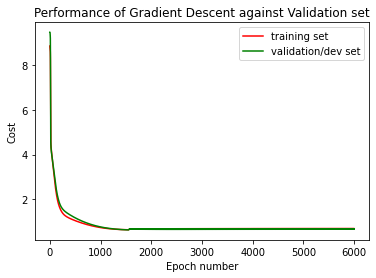

In [9]:
# Dataset preparation
import numpy as np
import pandas as pd

# Step 1: Read dataset from file
filename = '/kaggle/input/diabetes-dataset/diabetes2.csv'
df = read_csv_file(filename)

input_data, param_dict = logistic_regression_model(df)

# Step 2: Split into input features and target label
# no_of_columns = get_no_of_columns(df)
# df_input, df_target = split_dataset_feature_target(df, no_of_columns)

# # Normalize input dataset
# df_normalize = normalize_dataset(df_input, no_of_columns)
# df_normalize['Outcome'] = df['Outcome']

# #Split the data into Training Set, Dev/Validation Set and Test Set
# df_normalize.sample(frac=1).reset_index(drop=True)
# train_set = df_normalize[:461].copy()
# dev_set = df_normalize[461:614].copy()
# test_set = df_normalize[614:].copy()
# print(len(train_set)) # Output: 461
# print(len(dev_set))  # Output: 153
# print(len(test_set)) # Output: 154

Epoch value:  1100
1.0 1.0
1.0 1.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
1.0 0.0
0.0 0.0
0.0 0.0
AUC Score:  1.0


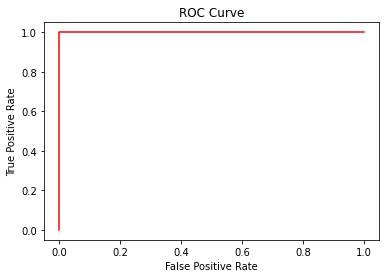

In [12]:
#Step 7: Calculate accuracy of model
# epoch_value = find_epoch_value(cost_train_dict, cost_dev_dict, epochs)
epoch_value = 1100
print("Epoch value: ", epoch_value)
w = param_dict[epoch_value]["w"]
b = param_dict[epoch_value]["b"]
# accuracy_tuple = calculate_model_accuracy(train_input, train_target, dev_input, dev_target, test_input, test_target, w, b)
train_input = input_data["train_input"]
train_target = input_data["train_target"]
dev_input = input_data["dev_input"]
dev_target = input_data["dev_target"]
test_input = input_data["test_input"]
test_target = input_data["test_target"]
plot_roc_curve(train_input, train_target, w, b)

In [22]:
threshold = 0.2233
accuracy_tuple = calculate_model_accuracy(train_input, train_target, dev_input, dev_target, test_input, test_target, w, b, threshold)

Training accuracy:  100.0
Dev accuracy:  100.0
Test accuracy:  73.07692307692308 

Training error:  0.0
Dev error:  0.0
Test error:  26.92307692307692


In [ ]:
train_dataset = train_input.transpose().copy()
# Visualize the dataset
import matplotlib.pyplot as plt
fig = plt.figure()
xlabel = 'DiabetesPedigreeFunction'
ylabel = 'Age'
plt.scatter(train_dataset[xlabel], train_dataset[ylabel])
plt.title('Dataset Plot')
plt.xlabel(xlabel)
plt.ylabel(ylabel)
plt.show()